In [4]:
from google.colab import files
files.upload();

Saving howpop_train.csv to howpop_train.csv


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Preparation**

## Read file into dataframe

In [6]:
df = pd.read_csv("howpop_train.csv")

In [7]:
df.T # transpose dataset to display it like was mentioned in the requirements

,0,1,2,3,4,5,6,7,8,9,...,134127,134128,134129,134130,134131,134132,134133,134134,134135,134136
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/,https://habrahabr.ru/post/18295/,https://geektimes.ru/post/18306/,https://habrahabr.ru/post/18311/,https://habrahabr.ru/post/31352/,https://habrahabr.ru/post/18314/,...,https://habrahabr.ru/post/314068/,https://habrahabr.ru/post/314078/,https://habrahabr.ru/post/314040/,https://habrahabr.ru/post/314082/,https://habrahabr.ru/post/313960/,https://habrahabr.ru/company/mailru/blog/314014/,https://geektimes.ru/post/282086/,https://geektimes.ru/post/282090/,https://geektimes.ru/post/282092/,https://habrahabr.ru/post/314088/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru,habrahabr.ru,geektimes.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,...,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru,geektimes.ru,geektimes.ru,habrahabr.ru
post_id,18284,18285,18286,18291,18294,18295,18306,18311,31352,18314,...,314068,314078,314040,314082,313960,314014,282086,282090,282092,314088
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00,2008-01-02 16:14:00,2008-01-03 12:55:00,2008-01-03 17:20:00,2008-01-03 22:54:00,2008-01-03 23:56:00,...,2016-10-31 19:53:00,2016-10-31 19:54:00,2016-10-31 20:01:00,2016-10-31 20:29:00,2016-10-31 21:08:00,2016-10-31 21:45:00,2016-10-31 22:44:00,2016-10-31 23:26:00,2016-10-31 23:52:00,2016-10-31 23:56:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo,@lvea,@abbasov,@Andrey,@kvladimir,@lvea,...,@plan_A,@semen_grinshtein,@MACROSCOP,@alexeev_n,@Nuteralie,NaN,@marks,@Shapelez,@ragequit,@Mgrin
flow,develop,design,design,design,NaN,develop,NaN,misc,develop,develop,...,develop,management,develop,management,management,develop,NaN,NaN,NaN,develop
polling,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
content_len,4305,7344,8431,5662,3706,3171,435,3291,1953,3712,...,13905,13832,8493,4529,7104,56033,5504,2883,5735,9359
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone,Mobile2.0 Всеобщая доступность,Modbook в действии,В чем суть проекта Vladelia.ru,Подтверждено: Wikia Search запускается в понед...,Mobile 2.0 Выбор предпочтительного способа связи,...,ASO оптимизация. Составление семантического яд...,Как Windows NT стала «убийцей» Novell NetWare OS,Как найти вектор развития программного продукт...,Почему в очередной раз проваливается внедрение...,Большое количество людей в опенспейсе мешает с...,Парсинг JSON — это минное поле,Заработала система раннего предупреждения НАСА...,Арзамасский городской суд постановил заблокиро...,Медиа-коммуникационный союз планирует внести в...,mgr-forms-react: Простой компонент для простей...
comments,0,1,47,102,230,22,10,64,23,6,...,16,31,12,30,82,58,52,16,47,4


## 4. Remove columns which ends by **_lognorm**

In [8]:
df = df.drop([col for col in df.columns if col.endswith('_lognorm')], axis=1);
df.T

,0,1,2,3,4,5,6,7,8,9,...,134127,134128,134129,134130,134131,134132,134133,134134,134135,134136
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/,https://habrahabr.ru/post/18295/,https://geektimes.ru/post/18306/,https://habrahabr.ru/post/18311/,https://habrahabr.ru/post/31352/,https://habrahabr.ru/post/18314/,...,https://habrahabr.ru/post/314068/,https://habrahabr.ru/post/314078/,https://habrahabr.ru/post/314040/,https://habrahabr.ru/post/314082/,https://habrahabr.ru/post/313960/,https://habrahabr.ru/company/mailru/blog/314014/,https://geektimes.ru/post/282086/,https://geektimes.ru/post/282090/,https://geektimes.ru/post/282092/,https://habrahabr.ru/post/314088/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru,habrahabr.ru,geektimes.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,...,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru,geektimes.ru,geektimes.ru,habrahabr.ru
post_id,18284,18285,18286,18291,18294,18295,18306,18311,31352,18314,...,314068,314078,314040,314082,313960,314014,282086,282090,282092,314088
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00,2008-01-02 16:14:00,2008-01-03 12:55:00,2008-01-03 17:20:00,2008-01-03 22:54:00,2008-01-03 23:56:00,...,2016-10-31 19:53:00,2016-10-31 19:54:00,2016-10-31 20:01:00,2016-10-31 20:29:00,2016-10-31 21:08:00,2016-10-31 21:45:00,2016-10-31 22:44:00,2016-10-31 23:26:00,2016-10-31 23:52:00,2016-10-31 23:56:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo,@lvea,@abbasov,@Andrey,@kvladimir,@lvea,...,@plan_A,@semen_grinshtein,@MACROSCOP,@alexeev_n,@Nuteralie,NaN,@marks,@Shapelez,@ragequit,@Mgrin
flow,develop,design,design,design,NaN,develop,NaN,misc,develop,develop,...,develop,management,develop,management,management,develop,NaN,NaN,NaN,develop
polling,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
content_len,4305,7344,8431,5662,3706,3171,435,3291,1953,3712,...,13905,13832,8493,4529,7104,56033,5504,2883,5735,9359
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone,Mobile2.0 Всеобщая доступность,Modbook в действии,В чем суть проекта Vladelia.ru,Подтверждено: Wikia Search запускается в понед...,Mobile 2.0 Выбор предпочтительного способа связи,...,ASO оптимизация. Составление семантического яд...,Как Windows NT стала «убийцей» Novell NetWare OS,Как найти вектор развития программного продукт...,Почему в очередной раз проваливается внедрение...,Большое количество людей в опенспейсе мешает с...,Парсинг JSON — это минное поле,Заработала система раннего предупреждения НАСА...,Арзамасский городской суд постановил заблокиро...,Медиа-коммуникационный союз планирует внести в...,mgr-forms-react: Простой компонент для простей...
comments,0,1,47,102,230,22,10,64,23,6,...,16,31,12,30,82,58,52,16,47,4


In [9]:
df.describe()

,post_id,content_len,comments,favs,views,votes_plus,votes_minus
count,134137.000000,134137.000000,134137.000000,134137.000000,1.341370e+05,133566.000000,133566.000000
mean,181307.054265,7516.929699,39.625994,71.999866,1.663101e+04,35.536888,8.050035
std,81766.350702,8724.771640,62.398958,145.854135,3.147982e+04,42.461073,11.398282
min,18284.000000,1.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000
25%,115565.000000,2179.000000,7.000000,8.000000,2.100000e+03,11.000000,2.000000
50%,182666.000000,4949.000000,19.000000,27.000000,7.600000e+03,22.000000,5.000000
75%,257401.000000,9858.000000,48.000000,78.000000,1.870000e+04,45.000000,10.000000
max,314088.000000,352471.000000,2266.000000,8718.000000,1.730000e+06,1466.000000,445.000000


## 6. Convert **published** column to datetime format

In [10]:
df['published'] = pd.to_datetime(df['published']);
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   url          134137 non-null  object        
 1   domain       134137 non-null  object        
 2   post_id      134137 non-null  int64         
 3   published    134137 non-null  datetime64[ns]
 4   author       97657 non-null   object        
 5   flow         97048 non-null   object        
 6   polling      134137 non-null  bool          
 7   content_len  134137 non-null  int64         
 8   title        134137 non-null  object        
 9   comments     134137 non-null  int64         
 10  favs         134137 non-null  int64         
 11  views        134137 non-null  int64         
 12  votes_plus   133566 non-null  float64       
 13  votes_minus  133566 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 13.4+ M

## 7. Create several columns based on the published column

In [47]:
df['year'] = [d.year for d in df.published];
df['month'] = [d.month for d in df.published];
df['dayofweek'] = [d.isoweekday() for d in df.published];
df['hour'] = [d.hour for d in df.published];

# **Data Analysis**

### **Березень 2015**: 1. У якому році та місяці було найбільше публікацій?


In [12]:
grouped = df.groupby(['year', 'month']).size().reset_index(name='counts')
grouped['year_month'] = grouped['year'].astype(str) + '-' + grouped['month'].astype(str);

plt.figure(figsize=(25, 5), dpi=1080)
plt.bar(grouped['year_month'], grouped['counts']);
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Year-Month')
plt.ylabel('Number of Publications')
plt.title('Number of Publications per Year and Month')
plt.tight_layout()
plt.show()

In [13]:
max_pubs = grouped.loc[grouped['counts'].idxmax()]
max_pubs

,86
year,2015
month,3
counts,2189
year_month,2015-3


## **2. Проаналізуйте публікації в місяці з попереднього питання. Оберіть один або кілька варіантів.**

*   Один або кілька днів сильно виділяються із загальної картини
*   **На Хабрі (habrahabr.ru) завжди більше статей, ніж на Гіктаймсі (geektimes.ru)**
*   По суботах на Гіктаймсі та Хабрі публікують приблизно однакове число статей





### **FALSE**: Один або кілька днів сильно виділяються із загальної картини
Ні, проаналізувавши графік, можемо побачити, що розподіл кількості публікацій статей є відносно рівномірним, особливих аномальних викидів не спостерігається.

### **TRUE**: На Хабрі (habrahabr.ru) завжди більше статей, ніж на Гіктаймсі (geektimes.ru)

Побудуємо графік для відображення кількості публікацій на Хабрі і на Гіктаймсі в одній системі координат і встановимо значення **hue** на колонку **domain**, щоб мати змогу проаналізувати кількість статей для певного домену. Бачимо, що справді на Хабрі завжди більше статей.

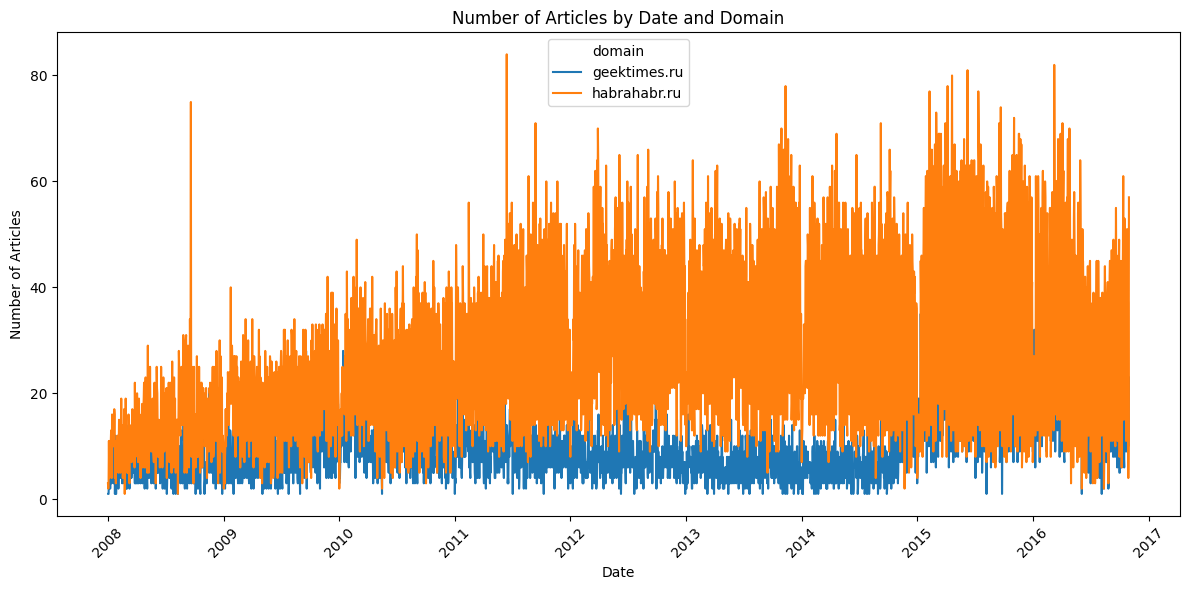

In [14]:
# Додаємо стовпці для дня і години
df['date'] = df['published'].dt.date

# Групуємо за доменом і датою, рахуємо кількість статей
grouped = df.groupby(['domain', 'date']).size().reset_index(name='article_count')

# Створимо графік
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='article_count', hue='domain', data=grouped)

plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Number of Articles by Date and Domain')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### **FALSE**: По суботах на Гіктаймсі та Хабрі публікують приблизно однакове число статей

Отримавши дані, які стосуються суботніх публікацій і згрупувавши їх за доменом, отримуємо наведені нижче ствовпчикові діаграми, які показують, що по суботах на Гіктаймсі та Хабрі насправді публікують різне число статей.

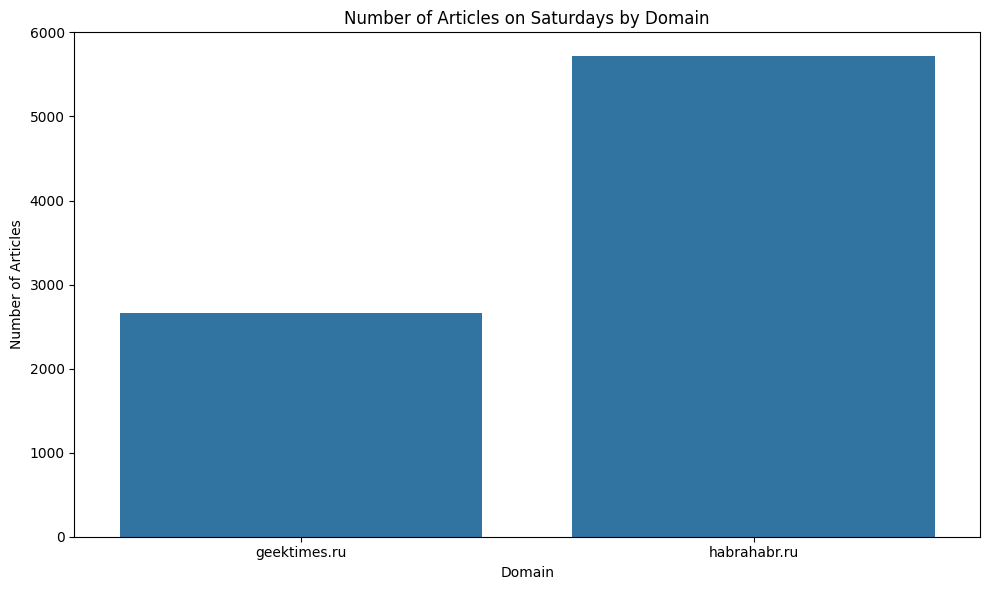

In [15]:
# Фільтруємо дані для суботах
saturdays_df = df[df['dayofweek'] == 6]

# Групуємо за доменом і рахуємо кількість статей
saturdays_counts = saturdays_df.groupby('domain').size().reset_index(name='article_count')

# Побудова графіка
plt.figure(figsize=(10, 6))
sns.barplot(x='domain', y='article_count', data=saturdays_counts)

plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.title('Number of Articles on Saturdays by Domain')
plt.tight_layout()

plt.show()

## Коли найкраще опублікувати статтю? Оберіть один або кілька варіантів.
*   Найбільше переглядів набирають статті, опубліковані о 12 годині дня
*   В опублікованих о 10 ранку постів найбільше коментарів
*   **Найбільше переглядів набирають статті, опубліковані о 6 годині ранку**
*   Максимальна кількість коментарів на Гіктаймсі набрала стаття, опублікована о 9
годині вечора
*   На Хабрі денні статті коментують частіше, ніж вечірні

### **FALSE**: Найбільше переглядів набирають статті, опубліковані о 12 годині дня

Згрупуємо дані за годинами й отримаємо середнє значення переглядів статей для кожної з них. За отриманими даними побудуємо графік, на якому видно, що запропоноване твердження не справедливе.

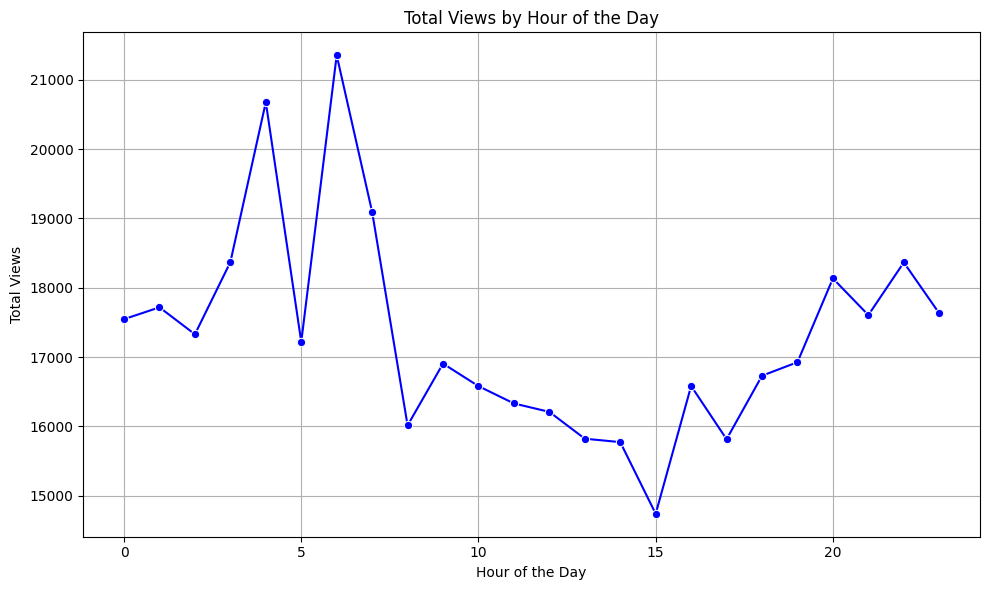

In [36]:
# Групуємо за годинами і рахуємо середню кількість переглядів
hourly_views = df.groupby('hour')['views'].mean().reset_index()

# Побудова графіка
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='views', data=hourly_views, marker='o', color='blue')

plt.xlabel('Hour of the Day')
plt.ylabel('Total Views')
plt.title('Total Views by Hour of the Day')
plt.grid(True)
plt.tight_layout()

plt.show()

### **FALSE**: В опублікованих о 10 ранку постів найбільше коментарів

Скористаємося згаданим вище підходом і згрупуємо дані за годинами, потім знайдемо значення середньої кількості коментарів для кожної з отриманих годин. Побудуємо графік, скориставшись бібліотекою seaborn для відображення залежності кількості коментарів від часу доби. Проаналізувавши отримані результати, робимо висновок, що наведене в умові твердження хибне.

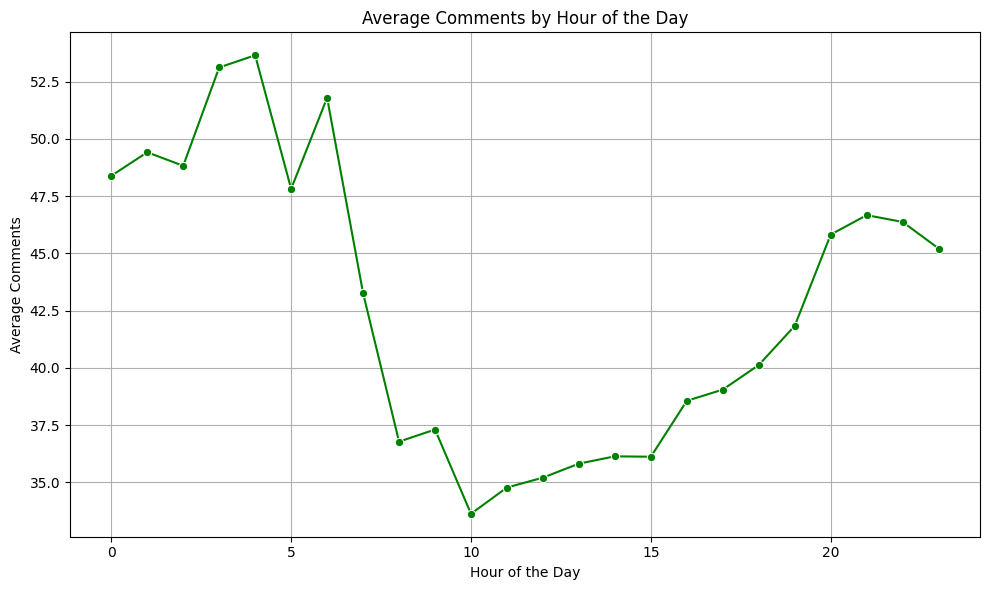

In [35]:
# Групуємо за годинами і рахуємо середню кількість коментарів
hourly_comments = df.groupby('hour')['comments'].mean().reset_index()

# Побудова графіка
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='comments', data=hourly_comments, marker='o', color='green')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Comments')
plt.title('Average Comments by Hour of the Day')
plt.grid(True)
plt.tight_layout()

plt.show()

### **TRUE**: Найбільше переглядів набирають статті, опубліковані о 6 годині ранку

### **FALSE**: Максимальна кількість коментарів на Гіктаймсі набрала стаття, опублікована о 9 годині вечора

In [44]:
#Фільтруємо для Geektimes
geektimes_df = df[df['domain'] == 'geektimes.ru']

# Групуємо за годинами і рахуємо максимальну кількість коментарів
hourly_comments_geektimes = geektimes_df.groupby('hour')['comments'].max().reset_index()

# Знаходимо годину з максимальною кількістю коментарів
max_comments_hour = hourly_comments_geektimes.loc[hourly_comments_geektimes['comments'].idxmax()]

# Виводимо результат
max_comments_hour['hour']

2

### **FALSE**: На Хабрі денні статті коментують частіше, ніж вечірні

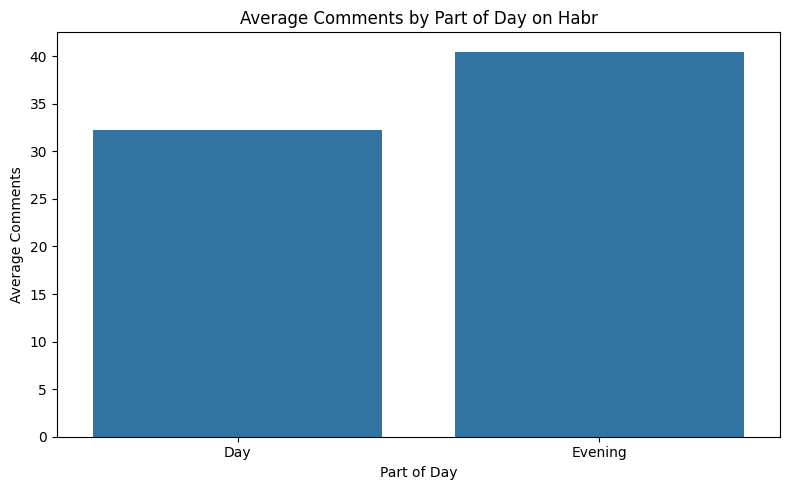

In [33]:
# Фільтруємо для Habr
habrahabr_df = df[df['domain'] == 'habrahabr.ru'].copy()

# Додаємо стовпець для частини доби за допомогою .loc[]
habrahabr_df.loc[:, 'part_of_day'] = habrahabr_df['hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Evening')

# Групуємо за частиною доби і рахуємо середню кількість коментарів
part_of_day_comments = habrahabr_df.groupby('part_of_day')['comments'].mean().reset_index()

# Побудова графіка
plt.figure(figsize=(8, 5))
sns.barplot(data=part_of_day_comments, x='part_of_day', y='comments')

plt.xlabel('Part of Day')
plt.ylabel('Average Comments')
plt.title('Average Comments by Part of Day on Habr')
plt.tight_layout()

plt.show()


## 4. **@alizar**: Кого з топ-20 авторів найчастіше мінусують?

In [30]:
# Групуємо за авторами та рахуємо кількість опублікованих статей
author_article_count = df.groupby('author')['post_id'].count().reset_index(name='article_count')

# Сортуємо авторів за кількістю статей та вибираємо топ-20
top_20_authors = author_article_count.sort_values(by='article_count', ascending=False).head(20)

# Групуємо за авторами та рахуємо кількість мінусів
author_minus_count = df.groupby('author')['votes_minus'].sum().reset_index(name='total_minus_votes')

# Об'єднуємо дані про топ-20 авторів і мінусування
top_20_authors_with_minus = pd.merge(top_20_authors, author_minus_count, on='author')

# Сортуємо за кількістю мінусів, щоб знайти авторів, яких найчастіше мінусують
top_20_authors_with_minus_sorted = top_20_authors_with_minus.sort_values(by='total_minus_votes', ascending=False)

# Виведення автора, якого найчастіше мінусують
top_20_authors_with_minus_sorted.head(1)

,author,article_count,total_minus_votes
0,@alizar,5292,41734.0


## 5. **FALSE**: Порівняйте суботи і понеділки. Чи правда, що по суботах автори пишуть в основному вдень, а по понеділках – в основному ввечері?

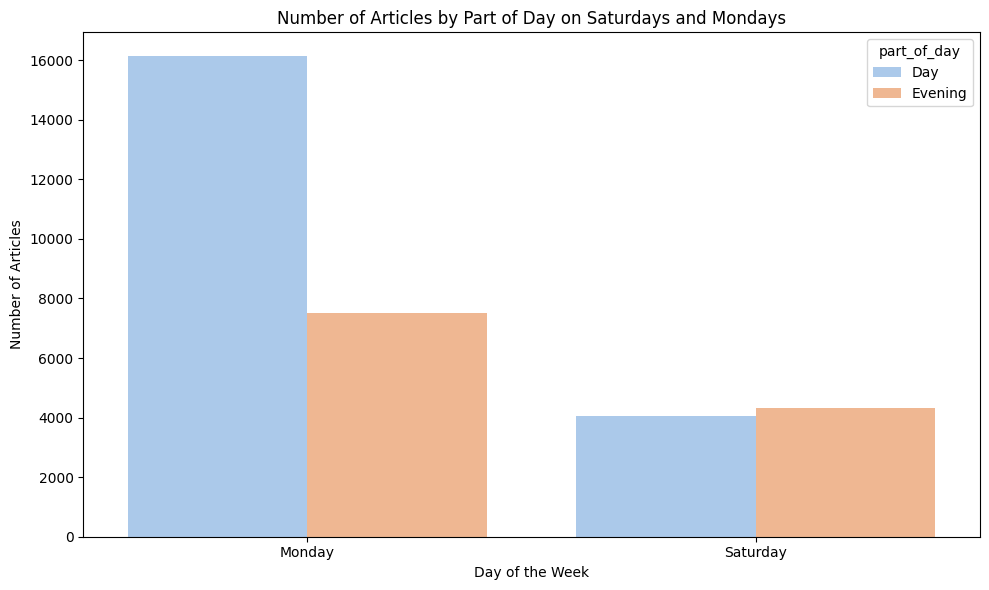

In [24]:
df['part_of_day'] = df['hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Evening')

# Фільтруємо для субот і понеділків
saturdays_and_mondays_df = df[df['dayofweek'].isin([1, 6])]

# Групуємо за днем тижня та частиною доби і рахуємо кількість статей
day_part_counts = saturdays_and_mondays_df.groupby(['dayofweek', 'part_of_day']).size().reset_index(name='article_count')

# Побудова графіка
plt.figure(figsize=(10, 6))
sns.barplot(x='dayofweek', y='article_count', hue='part_of_day', data=day_part_counts, palette='pastel')

# Заміна позначень на осі X з цифр на назви днів
plt.xticks([0, 1], ['Monday', 'Saturday'])

plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.title('Number of Articles by Part of Day on Saturdays and Mondays')
plt.tight_layout()

plt.show()